33855116.0


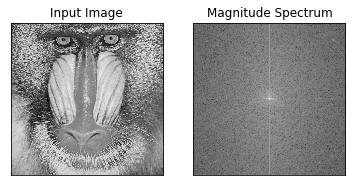

In [2]:
# TRABALHO 3 DE MC920

# ALUNO: Miguel Augusto Silva Guida   RA: 174847


import cv2
import numpy as np
import matplotlib.pyplot as plt


# Funcao que calcula a distancia de um pixel com o centro da imagem.
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# Funcao que gera um filtro passa baixa com a frequencia de corte D0.
def filtroPassaBaixaIdeal(D0,imgShape):
    passaBaixa = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                passaBaixa[y,x] = 1
    return passaBaixa

# Funcao que gera um filtro passa alta com a frequencia de corte D0.
def filtroPassaAltaIdeal(D0,imgShape):
    passaAlta = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                passaAlta[y,x] = 0
    return passaAlta

# Funcao que gera um filtro passa faixa com a frequencia de corte D0 e largura de banda W
def filtroPassaFaixaIdeal(D0, W,imgShape):
    passaFaixa = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            dist = distance((y,x),center)
            if (dist < D0 - W/2) | (dist > D0 + W/2):
                passaFaixa[y,x] = 0
    return passaFaixa



img = cv2.imread('baboon.png', 0)
#img = cv2.imread('butterfly.png', 0)

#Calcula FFT da imagem e translada a componente de frequencia zero para o centro.
f = np.fft.fft2(img)

#f[np.abs(f) < 1000] = 0

fshift = np.fft.fftshift(f)

print(np.max(np.abs(f)))


# Obtem o espectro original da imagem
magnitude_spectrum = 20*np.log(np.abs(fshift) + 1)

cv2.imwrite('magnitude_spectrum.png', magnitude_spectrum)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()





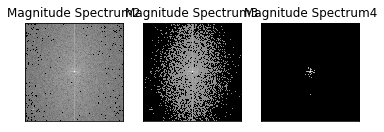

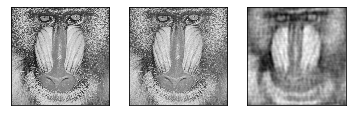

In [32]:
#EXEMPLOS DE COMPRESSAO


f2 = np.fft.fft2(img)
f3 = np.fft.fft2(img)
f4 = np.fft.fft2(img)

f2[np.abs(f2) < 1000] = 0
f3[np.abs(f3) < 10000] = 0
f4[np.abs(f4) < 100000] = 0


fshift2 = np.fft.fftshift(f2)
fshift3 = np.fft.fftshift(f3)
fshift4 = np.fft.fftshift(f4)

# exibe espectro das transformadas comprimidas
magnitude_spectrum2 = 20*np.log(np.abs(fshift2) + 1)
magnitude_spectrum3 = 20*np.log(np.abs(fshift3) + 1)
magnitude_spectrum4 = 20*np.log(np.abs(fshift4) + 1)

cv2.imwrite('magnitude_spectrumCompression2.png', magnitude_spectrum2)
cv2.imwrite('magnitude_spectrumCompression3.png', magnitude_spectrum3)
cv2.imwrite('magnitude_spectrumCompression4.png', magnitude_spectrum4)

plt.subplot(131),plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.title('Magnitude Spectrum2'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum3, cmap = 'gray')
plt.title('Magnitude Spectrum3'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(magnitude_spectrum4, cmap = 'gray')
plt.title('Magnitude Spectrum4'), plt.xticks([]), plt.yticks([])

plt.show()

# recupera as imagens com a compressao aplicada
f_ishift = np.fft.ifftshift(fshift2)
img_back2 = np.fft.ifft2(f_ishift)
img_back2 = np.real(img_back2)

f_ishift = np.fft.ifftshift(fshift3)
img_back3 = np.fft.ifft2(f_ishift)
img_back3 = np.real(img_back3)

f_ishift = np.fft.ifftshift(fshift4)
img_back4 = np.fft.ifft2(f_ishift)
img_back4 = np.real(img_back4)

cv2.imwrite('img_backCompression2.png', img_back2)
cv2.imwrite('img_backCompression3.png', img_back3)
cv2.imwrite('img_backCompression4.png', img_back4)

plt.subplot(131),plt.imshow(img_back2, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back3, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back4, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()



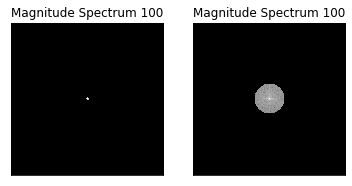

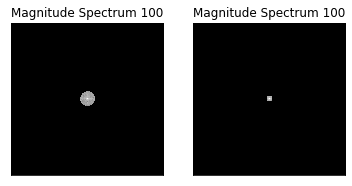

True

In [34]:
# FILTROS PASSA BAIXA IDEAL

#cria os filtros passa baixa com D0 = 50, 25, 15, 10, 5
passaBaixa5 = filtroPassaBaixaIdeal(5,img.shape)
passaBaixa50 = filtroPassaBaixaIdeal(50,img.shape)
passaBaixa25 = filtroPassaBaixaIdeal(25,img.shape)
passaBaixa15 = filtroPassaBaixaIdeal(15,img.shape)
passaBaixa10 = filtroPassaBaixaIdeal(10,img.shape)

# Aplica os filtros passa baixa no dominio de frequencia da imagem
fshift5 = fshift * passaBaixa5
fshift50 = fshift * passaBaixa50
fshift25 = fshift * passaBaixa25
fshift15 = fshift * passaBaixa15
fshift10 = fshift * passaBaixa10

# Calcula os espectros resultantes da aplicacao dos filtros
magnitude_spectrum5 = 20*np.log(np.abs(fshift5)+1)
magnitude_spectrum50 = 20*np.log(np.abs(fshift50)+1)
magnitude_spectrum25 = 20*np.log(np.abs(fshift25)+1)
magnitude_spectrum15 = 20*np.log(np.abs(fshift15)+1)
magnitude_spectrum10 = 20*np.log(np.abs(fshift10)+1)

cv2.imwrite('spectrumPB5.png', magnitude_spectrum5)
cv2.imwrite('spectrumPB50.png', magnitude_spectrum50)
cv2.imwrite('spectrumPB25.png', magnitude_spectrum25)
cv2.imwrite('spectrumPB15.png', magnitude_spectrum15)
cv2.imwrite('spectrumPB10.png', magnitude_spectrum10)



plt.subplot(121),plt.imshow(magnitude_spectrum100, cmap = 'gray')
plt.title('Magnitude Spectrum 100'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum50, cmap = 'gray')
plt.title('Magnitude Spectrum 100'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(magnitude_spectrum25, cmap = 'gray')
plt.title('Magnitude Spectrum 100'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum10, cmap = 'gray')
plt.title('Magnitude Spectrum 100'), plt.xticks([]), plt.yticks([])
plt.show()


# converte a imagem de volta do dominio de frequencia atraves de uma FFT inversa.
f_ishift5 = np.fft.ifftshift(fshift5)
img_back5 = np.fft.ifft2(f_ishift5)
img_back5 = np.real(img_back5)

f_ishift50 = np.fft.ifftshift(fshift50)
img_back50 = np.fft.ifft2(f_ishift50)
img_back50 = np.real(img_back50)

f_ishift25 = np.fft.ifftshift(fshift25)
img_back25 = np.fft.ifft2(f_ishift25)
img_back25 = np.real(img_back25)

f_ishift15 = np.fft.ifftshift(fshift15)
img_back15 = np.fft.ifft2(f_ishift15)
img_back15 = np.real(img_back15)

f_ishift10 = np.fft.ifftshift(fshift10)
img_back10 = np.fft.ifft2(f_ishift10)
img_back10 = np.real(img_back10)

cv2.imwrite('img_back5.png', img_back5)
cv2.imwrite('img_back50.png', img_back50)
cv2.imwrite('img_back25.png', img_back25)
cv2.imwrite('img_back15.png', img_back15)
cv2.imwrite('img_back10.png', img_back10)


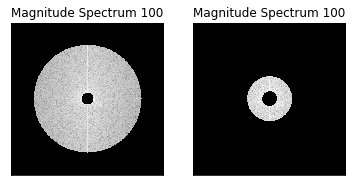

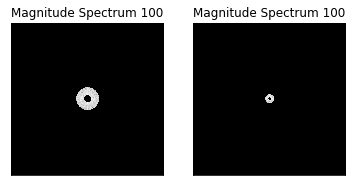

True

In [30]:
# FILTROS PASSA FAIXA IDEAL


#cria os filtros passa faixa com D0,W = 100,160; 50,50; 25,26; 10,10;
passaFaixa100 = filtroPassaFaixaIdeal(100,160,img.shape)
passaFaixa50 = filtroPassaFaixaIdeal(50,50,img.shape)
passaFaixa25 = filtroPassaFaixaIdeal(25,26,img.shape)
passaFaixa10 = filtroPassaFaixaIdeal(10,10,img.shape)

# Aplica os filtros passa faixa no dominio de frequencia da imagem
fshift100 = fshift * passaFaixa100
fshift50 = fshift * passaFaixa50
fshift25 = fshift * passaFaixa25
fshift10 = fshift * passaFaixa10

# Calcula os espectros resultantes da aplicacao dos filtros
magnitude_spectrum100 = 20*np.log(np.abs(fshift100)+1)
magnitude_spectrum50 = 20*np.log(np.abs(fshift50)+1)
magnitude_spectrum25 = 20*np.log(np.abs(fshift25)+1)
magnitude_spectrum10 = 20*np.log(np.abs(fshift10)+1)

cv2.imwrite('spectrumPF100.png', magnitude_spectrum100)
cv2.imwrite('spectrumPF50.png', magnitude_spectrum50)
cv2.imwrite('spectrumPF25.png', magnitude_spectrum25)
cv2.imwrite('spectrumPF10.png', magnitude_spectrum10)



plt.subplot(121),plt.imshow(magnitude_spectrum100, cmap = 'gray')
plt.title('Magnitude Spectrum '), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum50, cmap = 'gray')
plt.title('Magnitude Spectrum '), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(magnitude_spectrum25, cmap = 'gray')
plt.title('Magnitude Spectrum '), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum10, cmap = 'gray')
plt.title('Magnitude Spectrum '), plt.xticks([]), plt.yticks([])
plt.show()


# converte a imagem de volta do dominio de frequencia atraves de uma FFT inversa.
f_ishift100 = np.fft.ifftshift(fshift100)
img_back100 = np.fft.ifft2(f_ishift100)
img_back100 = np.real(img_back100)

f_ishift50 = np.fft.ifftshift(fshift50)
img_back50 = np.fft.ifft2(f_ishift50)
img_back50 = np.real(img_back50)

f_ishift25 = np.fft.ifftshift(fshift25)
img_back25 = np.fft.ifft2(f_ishift25)
img_back25 = np.real(img_back25)

f_ishift10 = np.fft.ifftshift(fshift10)
img_back10 = np.fft.ifft2(f_ishift10)
img_back10 = np.real(img_back10)

cv2.imwrite('img_backPF100.png', img_back100)
cv2.imwrite('img_backPF50.png', img_back50)
cv2.imwrite('img_backPF25.png', img_back25)
cv2.imwrite('img_backPF10.png', img_back10)


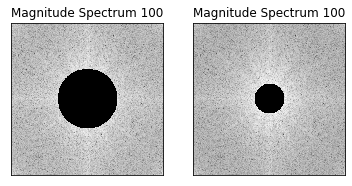

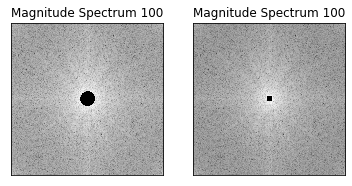

True

In [49]:
# FILTROS PASSA ALTA IDEAL

#cria os filtros passa alta com D0 = 100, 50, 25, 10
passaAlta100 = filtroPassaAltaIdeal(100,img.shape)
passaAlta50 = filtroPassaAltaIdeal(50,img.shape)
passaAlta25 = filtroPassaAltaIdeal(25,img.shape)
passaAlta10 = filtroPassaAltaIdeal(10,img.shape)

# Aplica os filtros passa alta no dominio de frequencia da imagem
fshift100 = fshift * passaAlta100
fshift50 = fshift * passaAlta50
fshift25 = fshift * passaAlta25
fshift10 = fshift * passaAlta10

# Calcula os espectros resultantes da aplicacao dos filtros
magnitude_spectrum100 = 20*np.log(np.abs(fshift100)+1)
magnitude_spectrum50 = 20*np.log(np.abs(fshift50)+1)
magnitude_spectrum25 = 20*np.log(np.abs(fshift25)+1)
magnitude_spectrum10 = 20*np.log(np.abs(fshift10)+1)

cv2.imwrite('spectrumPA100.png', magnitude_spectrum100)
cv2.imwrite('spectrumPA50.png', magnitude_spectrum50)
cv2.imwrite('spectrumPA25.png', magnitude_spectrum25)
cv2.imwrite('spectrumPA10.png', magnitude_spectrum10)



plt.subplot(121),plt.imshow(magnitude_spectrum100, cmap = 'gray')
plt.title('Magnitude Spectrum 100'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum50, cmap = 'gray')
plt.title('Magnitude Spectrum 100'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(magnitude_spectrum25, cmap = 'gray')
plt.title('Magnitude Spectrum 100'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum10, cmap = 'gray')
plt.title('Magnitude Spectrum 100'), plt.xticks([]), plt.yticks([])
plt.show()


# converte a imagem de volta do dominio de frequencia atraves de uma FFT inversa.
f_ishift100 = np.fft.ifftshift(fshift100)
img_back100 = np.fft.ifft2(f_ishift100)
img_back100 = np.real(img_back100)

f_ishift50 = np.fft.ifftshift(fshift50)
img_back50 = np.fft.ifft2(f_ishift50)
img_back50 = np.real(img_back50)

f_ishift25 = np.fft.ifftshift(fshift25)
img_back25 = np.fft.ifft2(f_ishift25)
img_back25 = np.real(img_back25)

f_ishift10 = np.fft.ifftshift(fshift10)
img_back10 = np.fft.ifft2(f_ishift10)
img_back10 = np.real(img_back10)

cv2.imwrite('img_backPA100.png', img_back100)
cv2.imwrite('img_backPA50.png', img_back50)
cv2.imwrite('img_backPA25.png', img_back25)
cv2.imwrite('img_backPA10.png', img_back10)

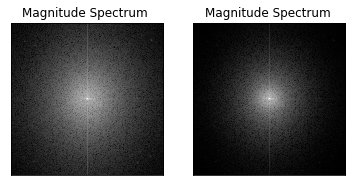

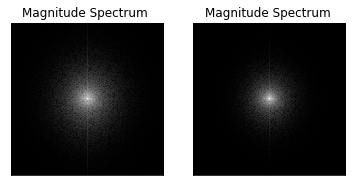

True

In [38]:
def filtroPassaBaixaButterworth(D0,imgShape,n):
    passaBaixa = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            passaBaixa[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return passaBaixa



# FILTROS PASSA BAIXA BUTTERWORTH

#cria os filtros passa alta com D0 = 50, 25, 15, 10, 5
passaBaixa50 = filtroPassaBaixaButterworth(50,img.shape, 2)
passaBaixa25 = filtroPassaBaixaButterworth(25,img.shape, 2)
passaBaixa15 = filtroPassaBaixaButterworth(15,img.shape, 2)
passaBaixa10 = filtroPassaBaixaButterworth(10,img.shape, 2)
passaBaixa5 = filtroPassaBaixaButterworth(5,img.shape, 2)

# Aplica os filtros passa baixa no dominio de frequencia da imagem
fshift50 = fshift * passaBaixa50
fshift25 = fshift * passaBaixa25
fshift15 = fshift * passaBaixa15
fshift10 = fshift * passaBaixa10
fshift5 = fshift * passaBaixa5

# Calcula os espectros resultantes da aplicacao dos filtros
magnitude_spectrum50 = 20*np.log(np.abs(fshift50)+1)
magnitude_spectrum25 = 20*np.log(np.abs(fshift25)+1)
magnitude_spectrum15 = 20*np.log(np.abs(fshift15)+1)
magnitude_spectrum10 = 20*np.log(np.abs(fshift10)+1)
magnitude_spectrum5 = 20*np.log(np.abs(fshift5)+1)


cv2.imwrite('spectrumBTPB50.png', magnitude_spectrum50)
cv2.imwrite('spectrumBTPB25.png', magnitude_spectrum25)
cv2.imwrite('spectrumBTPB15.png', magnitude_spectrum15)
cv2.imwrite('spectrumBTPB10.png', magnitude_spectrum10)
cv2.imwrite('spectrumBTPB5.png', magnitude_spectrum5)




plt.subplot(121),plt.imshow(magnitude_spectrum50, cmap = 'gray')
plt.title('Magnitude Spectrum '), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum25, cmap = 'gray')
plt.title('Magnitude Spectrum '), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(magnitude_spectrum15, cmap = 'gray')
plt.title('Magnitude Spectrum '), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum10, cmap = 'gray')
plt.title('Magnitude Spectrum '), plt.xticks([]), plt.yticks([])
plt.show()


# converte a imagem de volta do dominio de frequencia atraves de uma FFT inversa.
f_ishift50 = np.fft.ifftshift(fshift50)
img_back50 = np.fft.ifft2(f_ishift50)
img_back50 = np.real(img_back50)

f_ishift25 = np.fft.ifftshift(fshift25)
img_back25 = np.fft.ifft2(f_ishift25)
img_back25 = np.real(img_back25)

f_ishift15 = np.fft.ifftshift(fshift15)
img_back15 = np.fft.ifft2(f_ishift15)
img_back15 = np.real(img_back15)

f_ishift10 = np.fft.ifftshift(fshift10)
img_back10 = np.fft.ifft2(f_ishift10)
img_back10 = np.real(img_back10)

f_ishift5 = np.fft.ifftshift(fshift5)
img_back5 = np.fft.ifft2(f_ishift5)
img_back5 = np.real(img_back5)


cv2.imwrite('img_backBTPB50.png', img_back50)
cv2.imwrite('img_backBTPB25.png', img_back25)
cv2.imwrite('img_backBTPB15.png', img_back15)
cv2.imwrite('img_backBTPB10.png', img_back10)
cv2.imwrite('img_backBTPB5.png', img_back5)

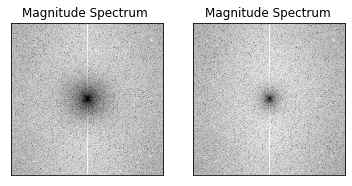

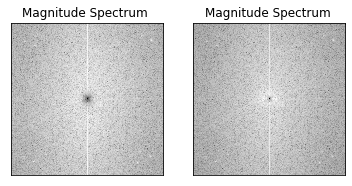

True

In [3]:
def filtroPassaAltaButterworth(D0,imgShape,n):
    passaAlta = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            passaAlta[y,x] = 1-1/(1+0.414*(distance((y,x),center)/D0)**(2*n))
    return passaAlta


# FILTROS PASSA ALTA BUTTEWORTH

#cria os filtros passa alta com D0 = 100, 50, 25, 10
passaAlta100 = filtroPassaAltaButterworth(100,img.shape, 2)
passaAlta50 = filtroPassaAltaButterworth(50,img.shape, 2)
passaAlta25 = filtroPassaAltaButterworth(25,img.shape, 2)
passaAlta10 = filtroPassaAltaButterworth(10,img.shape, 2)

# Aplica os filtros passa alta no dominio de frequencia da imagem
fshift100 = fshift * passaAlta100
fshift50 = fshift * passaAlta50
fshift25 = fshift * passaAlta25
fshift10 = fshift * passaAlta10

# Calcula os espectros resultantes da aplicacao dos filtros
magnitude_spectrum100 = 20*np.log(np.abs(fshift100)+1)
magnitude_spectrum50 = 20*np.log(np.abs(fshift50)+1)
magnitude_spectrum25 = 20*np.log(np.abs(fshift25)+1)
magnitude_spectrum10 = 20*np.log(np.abs(fshift10)+1)

cv2.imwrite('spectrumBTPA100.png', magnitude_spectrum100)
cv2.imwrite('spectrumBTPA50.png', magnitude_spectrum50)
cv2.imwrite('spectrumBTPA25.png', magnitude_spectrum25)
cv2.imwrite('spectrumBTPA10.png', magnitude_spectrum10)



plt.subplot(121),plt.imshow(magnitude_spectrum100, cmap = 'gray')
plt.title('Magnitude Spectrum '), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum50, cmap = 'gray')
plt.title('Magnitude Spectrum '), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(magnitude_spectrum25, cmap = 'gray')
plt.title('Magnitude Spectrum '), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum10, cmap = 'gray')
plt.title('Magnitude Spectrum '), plt.xticks([]), plt.yticks([])
plt.show()


# converte a imagem de volta do dominio de frequencia atraves de uma FFT inversa.
f_ishift100 = np.fft.ifftshift(fshift100)
img_back100 = np.fft.ifft2(f_ishift100)
img_back100 = np.real(img_back100)

f_ishift50 = np.fft.ifftshift(fshift50)
img_back50 = np.fft.ifft2(f_ishift50)
img_back50 = np.real(img_back50)

f_ishift25 = np.fft.ifftshift(fshift25)
img_back25 = np.fft.ifft2(f_ishift25)
img_back25 = np.real(img_back25)

f_ishift10 = np.fft.ifftshift(fshift10)
img_back10 = np.fft.ifft2(f_ishift10)
img_back10 = np.real(img_back10)

cv2.imwrite('img_backBTPA100.png', img_back100)
cv2.imwrite('img_backBTPA50.png', img_back50)
cv2.imwrite('img_backBTPA25.png', img_back25)
cv2.imwrite('img_backBTPA10.png', img_back10)

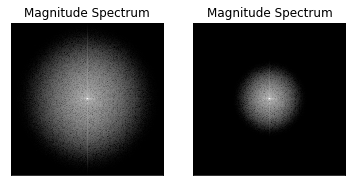

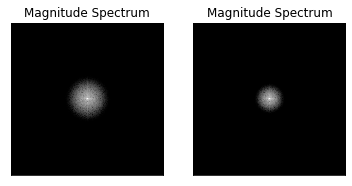

True

In [4]:
def filtroPassaBaixaGaussiano(D0,imgShape):
    passaBaixa = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            passaBaixa[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return passaBaixa



# FILTROS PASSA BAIXA GAUSSIANO

#cria os filtros passa alta com D0 = 50, 25, 15, 10, 5
passaBaixa50 = filtroPassaBaixaGaussiano(50,img.shape)
passaBaixa25 = filtroPassaBaixaGaussiano(25,img.shape)
passaBaixa15 = filtroPassaBaixaGaussiano(15,img.shape)
passaBaixa10 = filtroPassaBaixaGaussiano(10,img.shape)
passaBaixa5 = filtroPassaBaixaGaussiano(5,img.shape)

# Aplica os filtros passa baixa no dominio de frequencia da imagem
fshift5 = fshift * passaBaixa5
fshift50 = fshift * passaBaixa50
fshift25 = fshift * passaBaixa25
fshift15 = fshift * passaBaixa15
fshift10 = fshift * passaBaixa10

# Calcula os espectros resultantes da aplicacao dos filtros
magnitude_spectrum50 = 20*np.log(np.abs(fshift50)+1)
magnitude_spectrum25 = 20*np.log(np.abs(fshift25)+1)
magnitude_spectrum15 = 20*np.log(np.abs(fshift15)+1)
magnitude_spectrum10 = 20*np.log(np.abs(fshift10)+1)
magnitude_spectrum5 = 20*np.log(np.abs(fshift5)+1)

cv2.imwrite('spectrumGSPB50.png', magnitude_spectrum50)
cv2.imwrite('spectrumGSPB25.png', magnitude_spectrum25)
cv2.imwrite('spectrumGSPB15.png', magnitude_spectrum15)
cv2.imwrite('spectrumGSPB10.png', magnitude_spectrum10)
cv2.imwrite('spectrumGSPB5.png', magnitude_spectrum5)



plt.subplot(121),plt.imshow(magnitude_spectrum50, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum25, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(magnitude_spectrum15, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum10, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


# converte a imagem de volta do dominio de frequencia atraves de uma FFT inversa.
f_ishift50 = np.fft.ifftshift(fshift50)
img_back50 = np.fft.ifft2(f_ishift50)
img_back50 = np.real(img_back50)

f_ishift25 = np.fft.ifftshift(fshift25)
img_back25 = np.fft.ifft2(f_ishift25)
img_back25 = np.real(img_back25)

f_ishift15 = np.fft.ifftshift(fshift15)
img_back15 = np.fft.ifft2(f_ishift15)
img_back15 = np.real(img_back15)

f_ishift10 = np.fft.ifftshift(fshift10)
img_back10 = np.fft.ifft2(f_ishift10)
img_back10 = np.real(img_back10)

f_ishift5 = np.fft.ifftshift(fshift5)
img_back5 = np.fft.ifft2(f_ishift5)
img_back5 = np.real(img_back5)


cv2.imwrite('img_backGSPB50.png', img_back50)
cv2.imwrite('img_backGSPB25.png', img_back25)
cv2.imwrite('img_backGSPB15.png', img_back15)
cv2.imwrite('img_backGSPB10.png', img_back10)
cv2.imwrite('img_backGSPB5.png', img_back5)

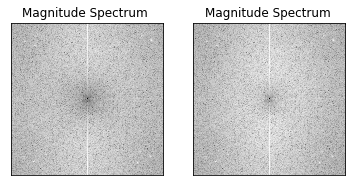

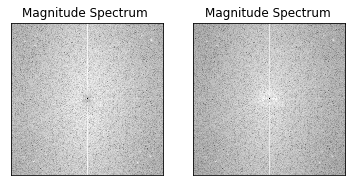

True

In [5]:
def filtroPassaAltaGaussiano(D0,imgShape):
    passaAlta = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            passaAlta[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return passaAlta

# FILTROS PASSA ALTA GAUSSIANO

#cria os filtros passa alta com D0 = 100, 50, 25, 10
passaAlta100 = filtroPassaAltaGaussiano(100,img.shape)
passaAlta50 = filtroPassaAltaGaussiano(50,img.shape)
passaAlta25 = filtroPassaAltaGaussiano(25,img.shape)
passaAlta10 = filtroPassaAltaGaussiano(10,img.shape)

# Aplica os filtros passa alta no dominio de frequencia da imagem
fshift100 = fshift * passaAlta100
fshift50 = fshift * passaAlta50
fshift25 = fshift * passaAlta25
fshift10 = fshift * passaAlta10

# Calcula os espectros resultantes da aplicacao dos filtros
magnitude_spectrum100 = 20*np.log(np.abs(fshift100)+1)
magnitude_spectrum50 = 20*np.log(np.abs(fshift50)+1)
magnitude_spectrum25 = 20*np.log(np.abs(fshift25)+1)
magnitude_spectrum10 = 20*np.log(np.abs(fshift10)+1)

cv2.imwrite('spectrumGSPA100.png', magnitude_spectrum100)
cv2.imwrite('spectrumGSPA50.png', magnitude_spectrum50)
cv2.imwrite('spectrumGSPA25.png', magnitude_spectrum25)
cv2.imwrite('spectrumGSPA10.png', magnitude_spectrum10)



plt.subplot(121),plt.imshow(magnitude_spectrum100, cmap = 'gray')
plt.title('Magnitude Spectrum '), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum50, cmap = 'gray')
plt.title('Magnitude Spectrum '), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(magnitude_spectrum25, cmap = 'gray')
plt.title('Magnitude Spectrum '), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum10, cmap = 'gray')
plt.title('Magnitude Spectrum '), plt.xticks([]), plt.yticks([])
plt.show()


# converte a imagem de volta do dominio de frequencia atraves de uma FFT inversa.
f_ishift100 = np.fft.ifftshift(fshift100)
img_back100 = np.fft.ifft2(f_ishift100)
img_back100 = np.real(img_back100)

f_ishift50 = np.fft.ifftshift(fshift50)
img_back50 = np.fft.ifft2(f_ishift50)
img_back50 = np.real(img_back50)

f_ishift25 = np.fft.ifftshift(fshift25)
img_back25 = np.fft.ifft2(f_ishift25)
img_back25 = np.real(img_back25)

f_ishift10 = np.fft.ifftshift(fshift10)
img_back10 = np.fft.ifft2(f_ishift10)
img_back10 = np.real(img_back10)

cv2.imwrite('img_backGSPA100.png', img_back100)
cv2.imwrite('img_backGSPA50.png', img_back50)
cv2.imwrite('img_backGSPA25.png', img_back25)
cv2.imwrite('img_backGSPA10.png', img_back10)